### <b>**Regression** </b>

### **Agenda**

we will cover the following concepts with the help of a business use case:
* Use Case: Regression
* Regression Algorithms
* Types of Model Evaluation Metrics

### **Use Case: Regression**

Note: At first, with the help of a use case, we are going to perform all the basic steps to reach the model training and predicition part.
  

#### <b> **Problem Statement:** </b>

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

#### <b> **Data Dictionary:**</b>

|Variables|Description|
|:-|:-|
|App| Application name|
|Category|Category to which the app belongs|
|Rating|Overall user rating of the app|
|Reviews|Number of user reviews for the app|
|Size|Size of the app|
|Installs|Number of user downloads/installs for the app|
|Type|Paid or Free|
|Price|Price of the app|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)<br>For example, a musical family game will belong to Music, Game, Family genres|
|Last Updated|Date when the app was last updated on Play Store|
|Current Ver|Current version of the app available on Play Store|
|Android Ver|Minimum required Android version|

**Let's Start!!**

#### <b> **Import Libraries**</b>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### <b> **Import and Check Dataset**</b>

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
# Check first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


#### <b> Observations </b>
The data will be displayed on the screen.

In [4]:
#Check number of columns and rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### <b> **Check Data Types**</b>

In [5]:
#checking datatypes
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### <b> **Finding and Treating Null Values**</b>

In [6]:
#Finding count of null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Dropping the records with null ratings
#This is done because ratings is our target variable
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.shape

(9360, 13)

#### <b> Handling the Variables </b>

**1. Clean the price column**

In [10]:
#Cleaning the price column
df.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [11]:
df['Price'].dtype

dtype('O')

#### <b> Observations </b>
Some have dollars, some have 0
* We need to conditionally handle this.
* First, let's modify the column to take 0 if value is 0, else take the first letter onwards.

In [12]:
#Modifying the column
df['Price'] = df['Price'].map(lambda x: 0 if x=='0' else float(x[1:]))

In [13]:
df['Price'].dtypes

dtype('float64')

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [14]:
df['Reviews'].dtypes

dtype('O')

In [15]:
#Converting reviews to numeric
df['Reviews'] = df['Reviews'].astype("int64")

In [16]:
df['Reviews'].dtypes

dtype('int64')

**3. Handle the installs column**

In [17]:
#Handling the installs column
df['Installs'].value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

We'll need to remove the commas and the plus signs.

<b> Defining function for the same </b>

In [18]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [19]:
df['Installs'] = df['Installs'].map(clean_installs)

In [20]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

**4. Handle the app size field**

In [21]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [22]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [23]:
df["Size"] = df["Size"].map(change_size)

In [24]:
df['Size'].head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [25]:
df['Size'].isnull().sum()

1637

In [26]:
df['Size'].fillna(df['Size'].median(),inplace=True)

In [27]:
df['Size'].isnull().sum()

0

In [28]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [29]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [30]:
df['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

2. Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [31]:
#Checking and counting the rows
len(df[df.Reviews > df.Installs])

7

In [32]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,14000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [33]:
df = df[df['Reviews'] <= df['Installs']].copy()

In [34]:
df.shape

(9353, 13)

In [35]:
len(df[(df['Type'] == "Free") & (df['Price']>0)])

0

#### **EDA**

#### <b> Box Plot: Price</b>

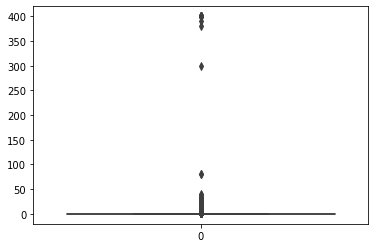

In [36]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(data=df['Price'])
plt.show()

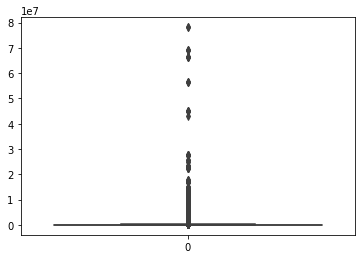

In [37]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(data=df.Reviews)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

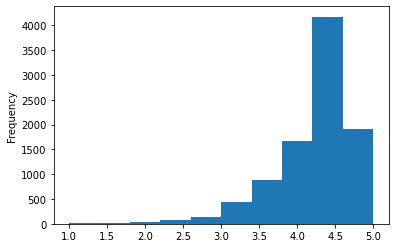

In [38]:
#Distributing the ratings
df.Rating.plot.hist()
#Show plot
plt.show()

##### **Histogram: Size**

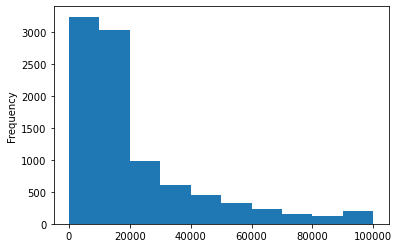

In [39]:
df['Size'].plot.hist()
#Show plot
plt.show()

##### **Outlier Treatment:**

##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [40]:
#Checking the records
len(df[df['Price'] > 200])

15

In [41]:
df[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [42]:
df = df[df['Price'] <= 200].copy()

df.shape

(9338, 13)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [43]:
#Dropping the records with more than 2 million reviews
df = df[df['Reviews'] <= 2000000]
df.shape

(8885, 13)

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.


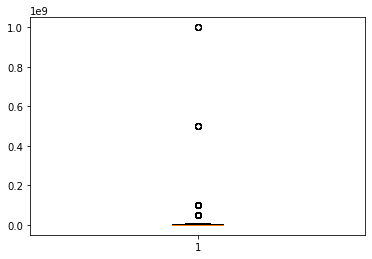

In [44]:
plt.boxplot(df['Installs'])
plt.show()

In [45]:
#Dropping the apps that have a very high number of installs
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### <b> Observations </b>
Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [46]:
#Dropping the apps with more than 100M installs
len(df[df['Installs'] >= 1000000000])

6

In [47]:
df = df[df['Installs'] < 1000000000].copy()
df.shape

(8879, 13)

In [48]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/join plot for Rating vs. Price**

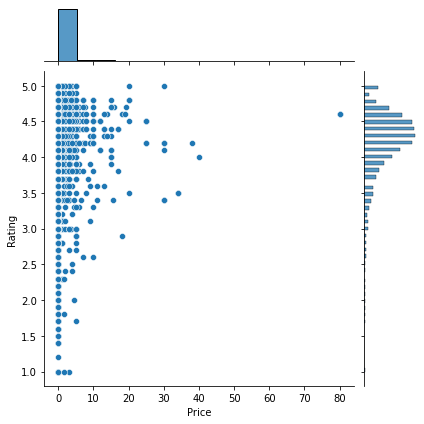

In [49]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(df.Price, df.Rating)

##### **2.	Make scatter plot/joinplot for Rating vs Size**

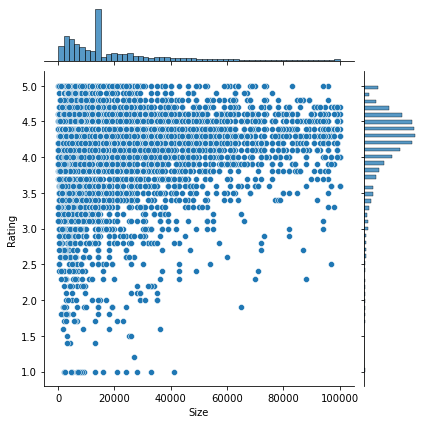

In [50]:
#Are heavier apps rated better?
sns.jointplot(df.Size, df.Rating)

##### **3.	Make scatter plot/joinplot for Rating vs Reviews**

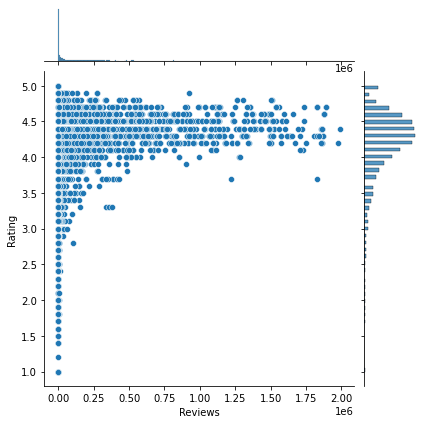

In [51]:
# Does more review mean a better rating always?
sns.jointplot(df.Reviews, df.Rating)

##### **4.	Make boxplot for Rating vs Content Rating**

<AxesSubplot:xlabel='Content_Rating', ylabel='Rating'>

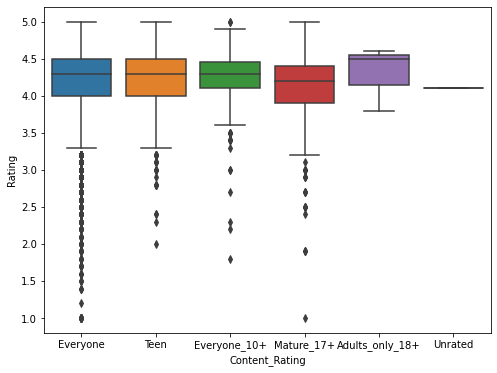

In [52]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(df['Content_Rating'], df.Rating)

##### **5. Make boxplot for Ratings vs. Category**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

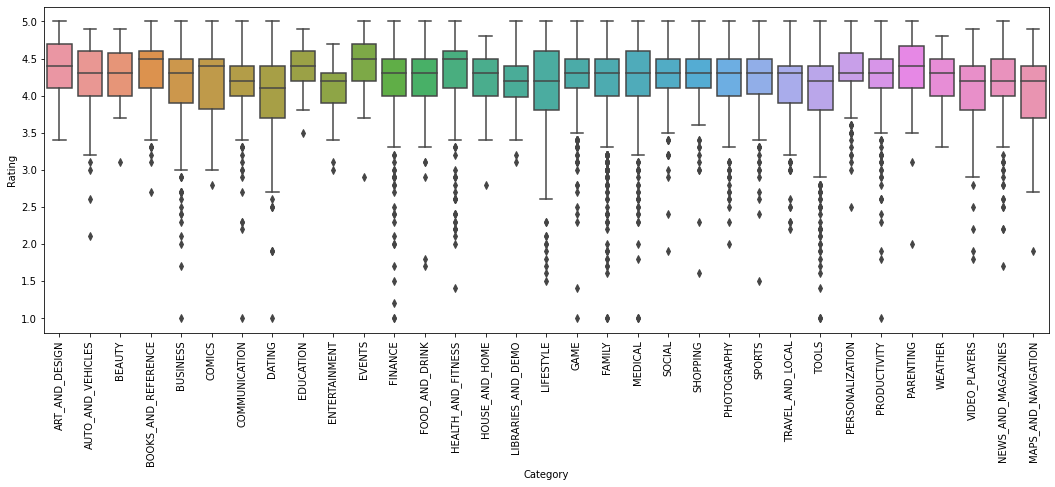

In [53]:
#Which genre has the best ratings?
plt.figure(figsize=[18,6])
sns.boxplot(df.Category, df.Rating)
plt.xticks(rotation=90)

#### **Pre-processing the Dataset**

##### **1. Make a copy of the dataset**

In [54]:
#Making a copy
df1 = df.copy()

##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [55]:
#Reducing the skew
df1['Installs'].describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [56]:
df1['Installs'] = df1['Installs'].apply(np.log1p)

In [57]:
df1['Reviews'] = df1['Reviews'].apply(np.log1p)

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [58]:
#Reducing the skew
df1['Installs'].describe()

count    8879.000000
mean       11.981171
std         3.617244
min         1.791759
25%         9.210440
50%        13.122365
75%        15.424949
max        20.030119
Name: Installs, dtype: float64

In [59]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [60]:
#Dropping the variables that are not useful for our task
df1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
df1.shape

(8879, 9)

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **inp2**.

In [61]:
df_with_dummies = pd.get_dummies(df1, drop_first=True)

In [62]:
df_with_dummies.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [63]:
df_with_dummies.shape

(8879, 157)

#### **Train-test split**
Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [64]:
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split

In [65]:
#Splitting of data as X (Features) and y (Target or label) happens here.
X=df_with_dummies.drop('Rating',axis=1)
y=df_with_dummies['Rating']

Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [66]:
#The X and y got splitted as 70% for training purpose and 30% for testing purpose here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [67]:
#Confirming whether it got splitted properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6215, 156)
(2664, 156)
(6215,)
(2664,)


In [68]:
X_train.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
2961,12.555542,14000.0,16.118096,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5802,9.668208,42000.0,13.815512,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5482,0.693147,655.0,2.397895,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6346,1.609438,54000.0,4.615121,2.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9606,9.060563,46000.0,13.122365,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
y_train.head()

2961    4.4
5802    4.4
5482    5.0
6346    3.8
9606    4.1
Name: Rating, dtype: float64

In [70]:
X_test.head()

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
10208,8.763584,4200.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9804,6.851185,11000.0,10.819798,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2193,10.545920,19000.0,16.118096,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7557,6.212606,597.0,11.512935,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6210,9.578726,21000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y_test.head()

10208    4.5
9804     4.0
2193     4.1
7557     4.2
6210     4.3
Name: Rating, dtype: float64

In [72]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


**Model 1: Using Simple Linear Regression model**

In [73]:
#Importing Linear Regression model
from sklearn.linear_model import LinearRegression

In [74]:
model1=LinearRegression()

In [75]:
#Training the model by exposing it to training data.
model1.fit(X_train,y_train)

LinearRegression()

In [76]:
#The model predicting the values of target from unexposed X_test data
pre=model1.predict(X_test)

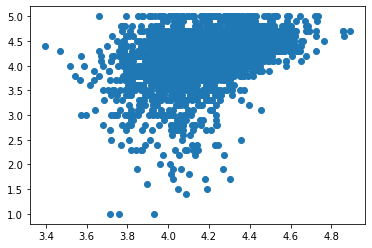

In [77]:
plt.scatter(pre,y_test)

In [78]:
from sklearn.metrics import r2_score

### The accuracy score is 16%. It means the model is not performed well.

In [79]:
r2_score(y_test,pre)

0.15940546064651007

In [80]:
print('Model Name: ', model1)
    
# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, pre),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, pre),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, pre)),3))
print('R2_score:', round(metrics.r2_score(y_test, pre),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, pre))),3))
    
# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, pre):
        y_test, pre = np.array(y_test), np.array(pre)
        return np.mean(np.abs((y_test - pre) / y_test)) * 100
    
# Evaluation of MAPE 

result = MAPE(y_test, pre)
print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, pre),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)
print('------------------------------------------------------------------------------------------------------------')
#-------------------------------------------------------------------------------------------
new_row = {'Model Name' : model1,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, pre),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, pre)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, pre),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, pre))),
               'R2_score' : metrics.r2_score(y_test, pre)}
Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.337
Mean Squared Error (MSE): 0.232
Root Mean Squared Error (RMSE): 0.482
R2_score: 0.159405
Root Mean Squared Log Error (RMSLE): -0.731
Mean Absolute Percentage Error (MAPE): 9.41 %
Adj R Square:  0.14437
------------------------------------------------------------------------------------------------------------


**Model 2: Using ordinary least squares(OLS) regression model**

In [81]:
#Importing the statsmodel library
import statsmodels.api as sm

In [82]:
#Applying linear regression
model2 = sm.OLS(y_train, X_train)

In [83]:
model2 = model2.fit()

### The accuracy score is 98%. It means the model is predicting fairly well.

In [84]:
#Finding the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3679.
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                        0.00
Time:                        19:36:20   Log-Likelihood:                         -4300.9
No. Observations:                6215   AIC:                                      8850.
Df Residuals:                    6091   BIC:                                      9685.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1636      0.006     26.026      0.000       0.151       0.176
Size                                         -4.403e-07   3.63e-07     -1.212      0.226   -1.15e-06    2.72e-07
Installs                                        -0.1372      0.006    -21.869      0.000      -0.149      -0.125
Price                                           -0.0034      0.004     -0.930      0.352      -0.011       0.004
Category_AUTO_AND_VEHICLES                       1.8292      0.134     13.689      0.000       1.567       2.091
Category_BEAUTY                                  1.9395      0.136     14.299      0.000       1.674       2.205
Category_BOOKS_AND_REFERENCE                     1.9065      0.131     14.576      0.000       1.650       2.163
Category_BUSINESS                                1.8217      0.130     14.020      0.000       1.567       2.076
Category_COMICS                                  2.6756      0.235     11.385      0.000       2.215       3.136
Category_COMMUNICATION                           1.7825      0.130     13.683      0.000       1.527       2.038
Category_DATING                                  1.7288      0.131     13.153      0.000       1.471       1.986
Category_EDUCATION                               3.3087      0.271     12.205      0.000       2.777       3.840
Category_ENTERTAINMENT                           3.2196      0.271     11.862      0.000       2.688       3.752
Category_EVENTS                                  1.9635      0.136     14.462      0.000       1.697       2.230
Category_FAMILY                                  3.3326      0.264     12.604      0.000       2.814       3.851
Category_FINANCE                                 1.7992      0.130     13.848      0.000       1.544       2.054
Category_FOOD_AND_DRINK                          1.8219      0.132     13.784      0.000       1.563       2.081
Category_GAME                                    3.6005      0.260     13.872      0.000       3.092       4.109
Category_HEALTH_AND_FITNESS                      1.8515      0.130     14.233      0.000       1.597       2.107
Category_HOUSE_AND_HOME                          1.8434      0.133     13.870      0.000       1.583       2.104
Category_LIBRARIES_AND_DEMO                      1.8658      0.134     13.919      0.000       1.603       2.129
Category_LIFESTYLE                               2.3479      0.237      9.887      0.000       1.882       2.813
Category_MAPS_AND_NAVIGATION                     1.7699      0.132     13.442      0.000       1.512       2.028
Category_MEDICAL                              